# Taller 2

## 1. Repaso del lenguaje de programacion Python

### La gran ventaja de los computadores y lenguajes de programación es que pueden hacer cálculos muy complejos en poco tiempo. Hoy en día, todo dispositivo electrónico cumple funciones de un computador. Nuestro celular es un computador pequeño que puede almacenar nuestros contactos, correos y mensajes y que está constantemente procesando datos.

![Celular](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/cellphone.jpg)

In [1]:
# Primero inicializamos las variables a y b
a = 2
b = 3.5

In [2]:
# Luego las imprimimos
print a
print b

2
3.5


In [3]:
# También es posible hacer operaciones directamente con estas variables
c=a+b
print c

5.5


En la mayoria de las situaciones, deberemos ser capaces de procesar varios numeros y hacer operaciones complejas con ellos. Es por ello que se creo el paquete de Python llamado NumPy, el cual permite hacer operaciones matematicas basicas y complejas. Para usarlo debemos ejecutar el siguiente comando

In [55]:
import numpy as np

Ahora crearemos un par de vectores y haremos operaciones aritmeticas con ellos

In [186]:
x=np.arange(0,10,0.1)
y1=20*np.sin(x) # seno de x
y2=10*np.sqrt(x) # raíz cuadrada de x, del inglés "square root"
y3=np.power(x,2) # elevar cada elemento del arreglo x, a la segunda potencia

Otro paquete de Python que se usa con bastante frecuencia es Matplotlib, el cual permite hacer graficos y figuras a partir de los datos que procesamos en Python. Para usarlo debemos ejecutar el siguiente comando

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

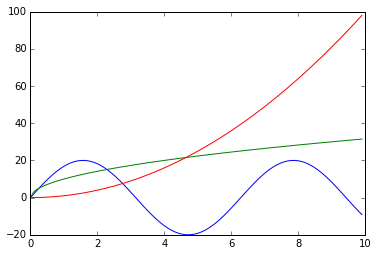

In [187]:
plt.plot(x, y1) # en azul
plt.plot(x, y2) # en verde
plt.plot(x, y3) # en rojo
plt.show()


## EJERCICIO 1

Cree una nueva variable llamada y4 y definala como y4=x. Agréguela al gráfico anterior de tal manera que ahora aparezcan 4 curvas en vez de 3. Escriba su codigo en la siguiente celda.

## 2. Usemos esta computadora para generar fractales usando un codigo escrito en Python

Los fractales son objetos geométricos cuya estructura básica, fragmentada o irregular, se repite a diferentes escalas. Es decir, es un objeto que al hacerle zoom se va repitiendo infinitas veces.

Uno de los conjutos fractales más conocidos es el fractal de Mandelbrot. Su definición matemática es muy sencilla y es por ello que resulta tan atractivo. Esta es una imagen del fractal de Mandelbrot.

![Conjunto de Mandelbrot](https://upload.wikimedia.org/wikipedia/commons/5/56/Mandelset_hires.png)

La definicion matemática de este conjunto es la siguiente

![Definicion matematica Mandelbrot](https://upload.wikimedia.org/math/1/2/d/12d3322f5960648e712c41e5a7fba307.png)

En las siguiente lineas, usarmeos Python para crear nuestro propio conjunto de Mandelbrot.
Primero cargamos los paquetes numpy, pylab y timeit. Estos serán usados para hacerl

In [36]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from timeit import default_timer as timer

La funcion mandel() calcula el conjunto de Mandelbrot para cierta posicion (x,y) en el plano imaginario. La funcion devuelve el numero de iteraciones antes de que la función escape a infinito.

La funcion create_fractal() itera sobre todos los pixels de la imagen y determina la coordenada compleja a partir de las coordenadas en pixels. En cada pixel se llama a la funcion mandel(). El valor que retorna create_fractal() se usa para colorear el conjutno de Mandelbrot.

In [48]:
def mandel(x, y, max_iters):
  """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i

  return max_iters

def create_fractal(limits, image, iters):
  min_x, max_x, min_y, max_y = limits
  
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color
    
def draw_rect(ax, limits):
    ax.add_patch( patches.Rectangle(
        (limits[0], limits[2]),      # (x,y)
        np.abs(limits[1]-limits[0]), # width
        np.abs(limits[3]-limits[2]), # height
        fill=False,                # filled?
        edgecolor='yellow',        # color
        linewidth=2                # line width
    )
)

Lo primero es definir el rango en el eje X y eje Y que queremos visualizar. La variable zoom es un vector de cuatro elementos que contiene valores en el siguiente orden [valor X minimo, valor X maximo, valor Y minimo, valor Y maximo]

In [79]:
zoom1=(-2.0, 1.0, -1.0, 1.0)
zoom2=(-2.0, -1.7, -0.1, 0.1)
zoom3=(-1.872, -1.858, -0.005, 0.005)

Ahora usamos la create_fractal para crear el fractal y usamos como parametro las variables de zoom que creamos anteriormente.

Mandelbrot created in 8.588086 s


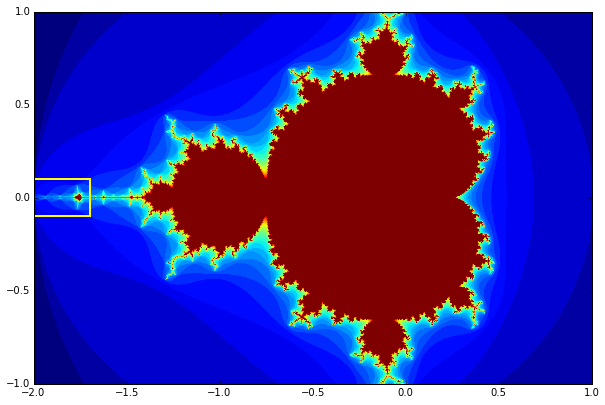

In [50]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(zoom1, image, 30) 
dt = timer() - start

print "Mandelbrot created in %f s" % dt
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, origin='lower', extent=zoom1)
draw_rect(ax, zoom2)

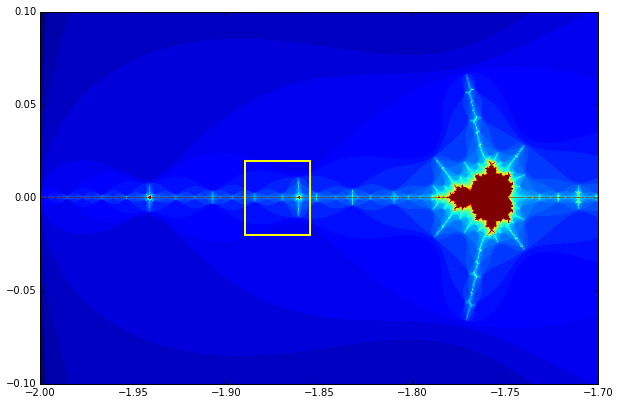

In [52]:
create_fractal(zoom2, image, 50)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, origin='lower', extent=zoom2)
draw_rect(ax, zoom3)

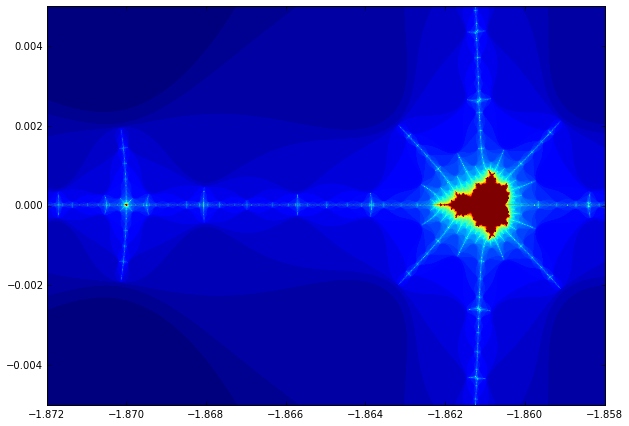

In [80]:
create_fractal(zoom3, image, 70)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, origin='lower', extent=zoom3)


## EJERCICIO 2

Haga un zoom en una región de la última figura de manera que vuelva a aparecer el fractal de color rojo. Escriba su codigo y ejecutelo en la siguiente celda.

## 3. Usar python para hacer graficos cartesianos y polares

La mayoria de los graficos que solemos ver en internet y los libros son del tipo cartesiano. Un grafico cartesiano es un tipo de grafico que tiene dos ejes perpendiculares, uno suele ir de manera horizontal (eje X) y el otro de manera vertical (eje Y). Los graficos cartesianos son muy utiles para presentar informacion como la posicion de un objeto.

Podemos usar como ejemplo la sala de computacion y como graficariamos la posicion de cada uno de nosotros.

![Sala de clases](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/sala_de_clases.jpg)

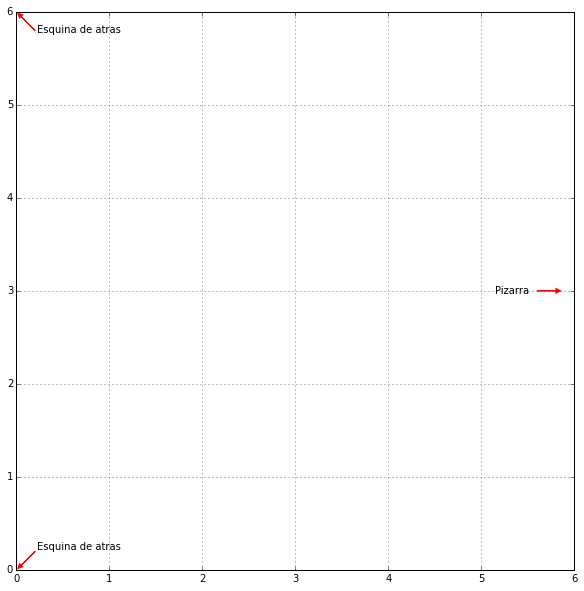

In [208]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid()
plt.text(0.22,0.22,'Esquina de atras',  horizontalalignment='left')
ax.arrow(0.2, 0.2, -0.15, -0.15, head_width=0.05, head_length=0.05, fc='red', ec='red')
plt.text(0.22,5.78,'Esquina de atras', horizontalalignment='left')
ax.arrow(0.2, 5.8, -0.15, 0.15, head_width=0.05, head_length=0.05, fc='red', ec='red')
plt.text(5.5, 3,'Pizarra', horizontalalignment='right', verticalalignment='center')
ax.arrow(5.6, 3., 0.2, 0., head_width=0.05, head_length=0.05, fc='red', ec='red')

Desde internet descargamos un archivo que contiene las posiciones de los alumnos en la sala de clases

In [169]:
import pandas as pd

data_url="https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/sala_de_clases.csv"
data=pd.read_csv(data_url, sep=',', comment='#', header=0)
data.head()

,id,x,y
0,1,1,1
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5


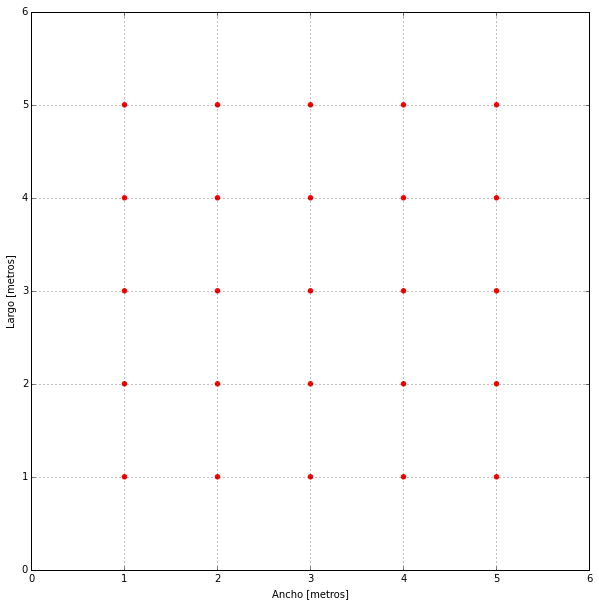

In [176]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('Ancho [metros]')
plt.ylabel('Largo [metros]')
plt.scatter(data['x'],data['y'], s=30, facecolor='red', edgecolor='None')
plt.grid()

Que tal si queremos graficar lo que el estudiante sentado al centro de la sala ve. Algo asi como cuantos compañeros cuenta cuando mira hacia la pizarra, cuantos compañeros cuenta cuando mira hacia atras de la sala y a que distancia se encuetra cada uno de ellos respecto a él.

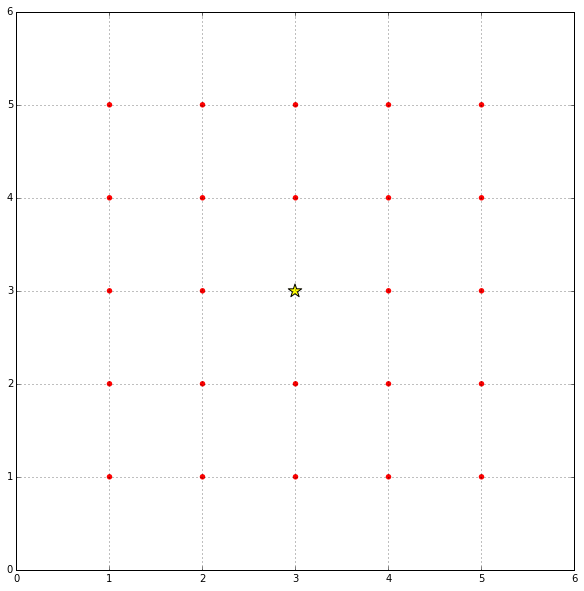

In [181]:
fig = plt.figure(figsize=(10,10))

plt.scatter(data['x'],data['y'], s=30, facecolor='red', edgecolor='None')
plt.scatter([3],[3],marker='*',s=200,c='yellow')
plt.grid()

Para estos casos es de utilidad usar un grafico de tipo polar. El grafico polar tiene la particularidad de ser centrado en algun objeto a elección (estrella amarilla en este caso) y ser más util al momento de describir como se ven los demas objetos al estar en la posición de la estrella amarilla.

![Polar](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/polar_coordinates.png)

In [216]:
centro=[3,3] # La variable centro contien la coordenada x,y del objeto central

# Calcular distancia
distancia=np.sqrt( (data['x']-centro[0])**2 + (data['y']-centro[1])**2 )
# Calcular el angulo
angulo=np.arctan2( (data['y']-centro[0]), (data['x']-centro[1]) )

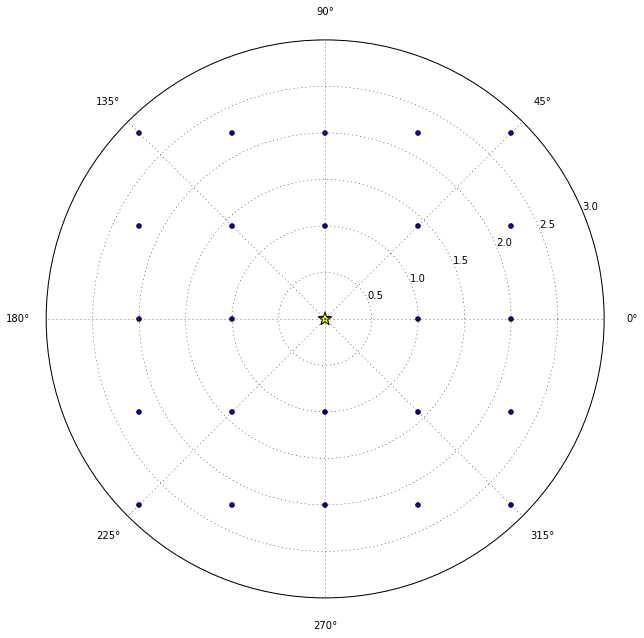

In [217]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
plt.scatter(angulo, distancia, marker='o')
plt.scatter([0],[0],marker='*',s=200,c='yellow')

## EJERCICIO 3

Use la posicion de otro estudiante como centro y haga nuevamente el gráfico polar pero esta vez centrado en aquel estudiante

## EJERCICIO 4

Ahora que sabemos como hacer graficos cartesianos y polares, usaremos estas herramientas para estudiar la distribucion espacial de las nebulosas de emisión o regiones HII en nuestra Galaxia.

![Nebulosas](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/orion_nebula.jpg)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import urllib2
%matplotlib inline

In [87]:
data_url="https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/regiones_HII_WISE.csv"
#urllib.urlretrieve(data_url, "regiones_HII_WISE.csv")

data=pd.read_csv(data_url, sep=',', comment='#', header=0)
data.head()

,id,longitud,latitud,radio,distancia
0,1,0.649,-0.080,0.7,7.8
1,2,0.729,-0.103,0.1,8.5
2,3,9.599,0.199,3.5,5.2
3,4,9.613,0.206,3.5,5.2
4,5,9.614,0.200,3.5,5.2


Las columnas longitud y latitud se refiere a la posicion en que vemos las regiones HII desde nuestra posición en la Galaxia. La longitud y latitud galáctica son parte de lo que llamamos sistema de coordenadas galácticas, en le cual el Sol se encuentra en el centro y el centro galácico se ubica a longitud=0º, latitud=0º y a una distancia de 8 kpc.

In [93]:
lon = coord.Angle(data['longitud']*u.degree)
lat = coord.Angle(data['latitud']*u.degree)
d = coord.Distance(data['distancia'], u.kpc)

print "Longitud galactica: ", lon
print "Latitud galactica: ", lat
print "Distancia desde el Sol: ", d

Longitud galactica:  [u'0d38m56.4s' u'0d43m44.4s' u'9d35m56.4s' ..., u'358d56m16.8s'
 u'358d58m55.2s' u'359d09m39.6s']
Latitud galactica:  [u'-0d04m48s' u'-0d06m10.8s' u'0d11m56.4s' ..., u'-0d01m48s' u'-0d01m48s'
 u'-0d02m13.2s']
Distancia desde el Sol:  [ 7.8  8.5  5.2 ...,  8.5  8.5  8.5] kpc


Use las columnas longitud y distancia para graficar la posicion de la regiones HII. Haga un gráfico polar y use puntos o circulos para mostrar las regiones HII en el gráfico. Use

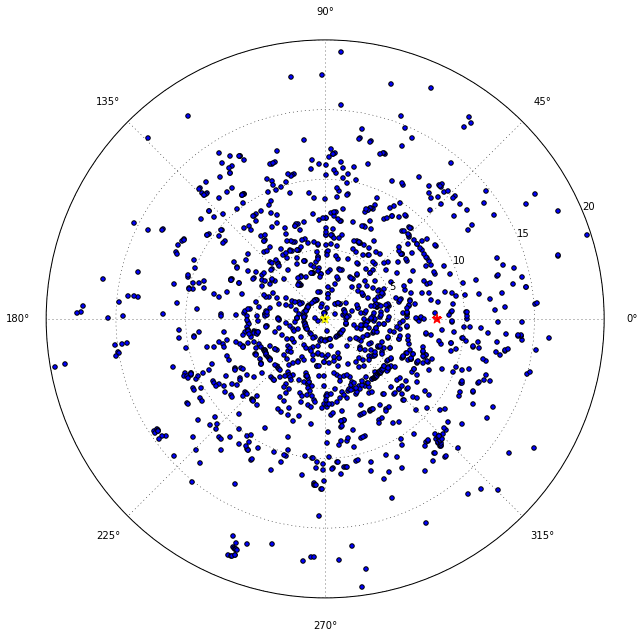

In [106]:
#fig,ax=plt.subplots(figsize=(10,10))
#ax = plt.axes(polar="true")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.set_ylim(0,20)
plt.scatter(lon, d, marker='o')
plt.scatter([0],[0], marker='*', s=100, color='yellow') # Posicion de Sol con estrella amarilla
plt.scatter([0],[8], marker='*', s=100, color='red') # Posicion del Centro Galactico con estrella roja

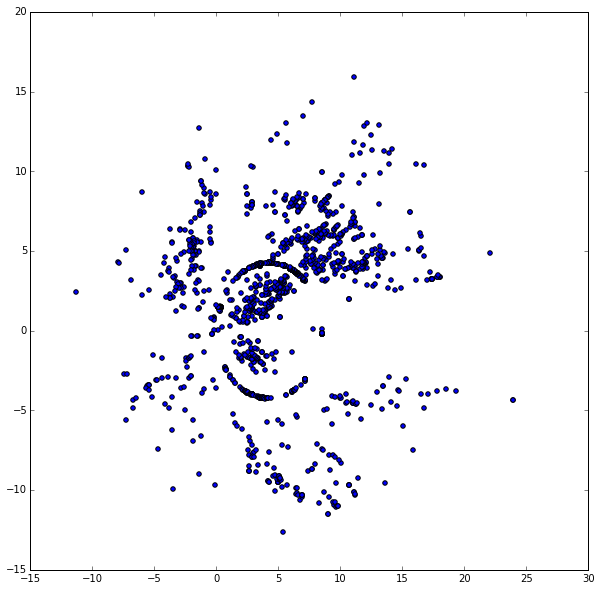

In [109]:
x=d*np.cos(lon.radian)
y=d*np.sin(lon.radian)

fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(x,y,marker='o')

## Actividad 2

Use tanto la longitud como la latitud galactica para graficar la distribución espacial de las regiones HII en la galaxia. En esta oportunidad, en vez de usar la proyección Polar usaremos una llamada Mollweyd. Para ello, reemplace el comando projection="polar" por projection="mollweide"

Un típico ejemplo de la proyección Mollweyd es el mapamundi que nos enseñan en clases

![Imagen de proyeccion Mollweyd](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/Mollweide-projection.jpg)

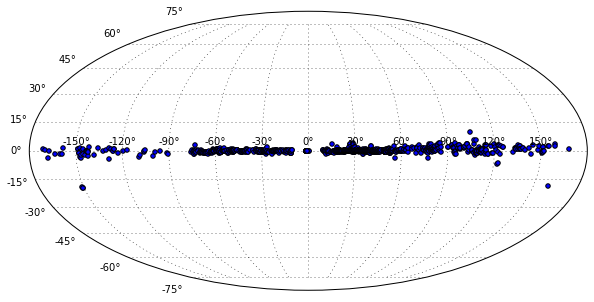

In [98]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(lon.wrap_at(180*u.degree).radian, lat.radian)
ax.grid(True)

## Actividad 3

Hacer un histograma de la distribucion